In [5]:
import pandas as pd

db = pd.read_csv('/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/dataAcquisition/marketingCampaign3/campaign3.csv')
pd.set_option('display.max_columns', None)
db.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [7]:
# Convert Date column to datetime
db['Date'] = pd.to_datetime(db['Date'])

# Create new columns for 'Target_Male' and 'Target_Female'
db['Target_Male'] = db['Target_Audience'].apply(lambda x: 1 if 'Men' in x or x == 'All Ages' else 0)
db['Target_Female'] = db['Target_Audience'].apply(lambda x: 1 if 'Women' in x or x == 'All Ages' else 0)

# Create dummies for each age group
age_groups = ['18-24', '25-34', '35-44']
for age_group in age_groups:
    db[f'Target_Age_{age_group}'] = db['Target_Audience'].apply(lambda x: 1 if age_group in x or x == 'All Ages' else 0)

# Drop the original 'Target_Audience' column
db.drop(['Target_Audience'], axis=1, inplace=True)

db['Acquisition_Cost'] = db['Acquisition_Cost'].str.replace('$', '').str.replace(',', '').astype(float)

# Converting the columns into integers
db['Duration'] = db['Duration'].apply(lambda x: int(x.split(' ')[0]))

# rename duration to duration_days
db.rename(columns={'Duration': 'Duration_Days'}, inplace=True)

# Create dummies for columns, not useful for now 
db = pd.get_dummies(db, columns=['Channel_Used', 'Language', 'Company', 'Campaign_Type', 'Location', 'Customer_Segment'], drop_first=False)

db.head()

,Campaign_ID,Duration_Days,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,Date,Target_Male,Target_Female,Target_Age_18-24,Target_Age_25-34,Target_Age_35-44,Channel_Used_Email,Channel_Used_Facebook,Channel_Used_Google Ads,Channel_Used_Instagram,Channel_Used_Website,Channel_Used_YouTube,Language_English,Language_French,Language_German,Language_Mandarin,Language_Spanish,Company_Alpha Innovations,Company_DataTech Solutions,Company_Innovate Industries,Company_NexGen Systems,Company_TechCorp,Campaign_Type_Display,Campaign_Type_Email,Campaign_Type_Influencer,Campaign_Type_Search,Campaign_Type_Social Media,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Customer_Segment_Fashionistas,Customer_Segment_Foodies,Customer_Segment_Health & Wellness,Customer_Segment_Outdoor Adventurers,Customer_Segment_Tech Enthusiasts
0,1,30,0.04,16174.0,6.29,506,1922,6,2021-01-01,1,0,1,0,0,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
1,2,60,0.12,11566.0,5.61,116,7523,7,2021-01-02,0,1,0,0,1,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
2,3,30,0.07,10200.0,7.18,584,7698,1,2021-01-03,1,0,0,1,0,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False
3,4,60,0.11,12724.0,5.55,217,1820,7,2021-01-04,1,1,1,1,1,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False
4,5,15,0.05,16452.0,6.50,379,4201,3,2021-01-05,1,0,0,1,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False


In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 45 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Campaign_ID                           200000 non-null  int64         
 1   Duration_Days                         200000 non-null  int64         
 2   Conversion_Rate                       200000 non-null  float64       
 3   Acquisition_Cost                      200000 non-null  float64       
 4   ROI                                   200000 non-null  float64       
 5   Clicks                                200000 non-null  int64         
 6   Impressions                           200000 non-null  int64         
 7   Engagement_Score                      200000 non-null  int64         
 8   Date                                  200000 non-null  datetime64[ns]
 9   Target_Male                           200000 non-null  int6

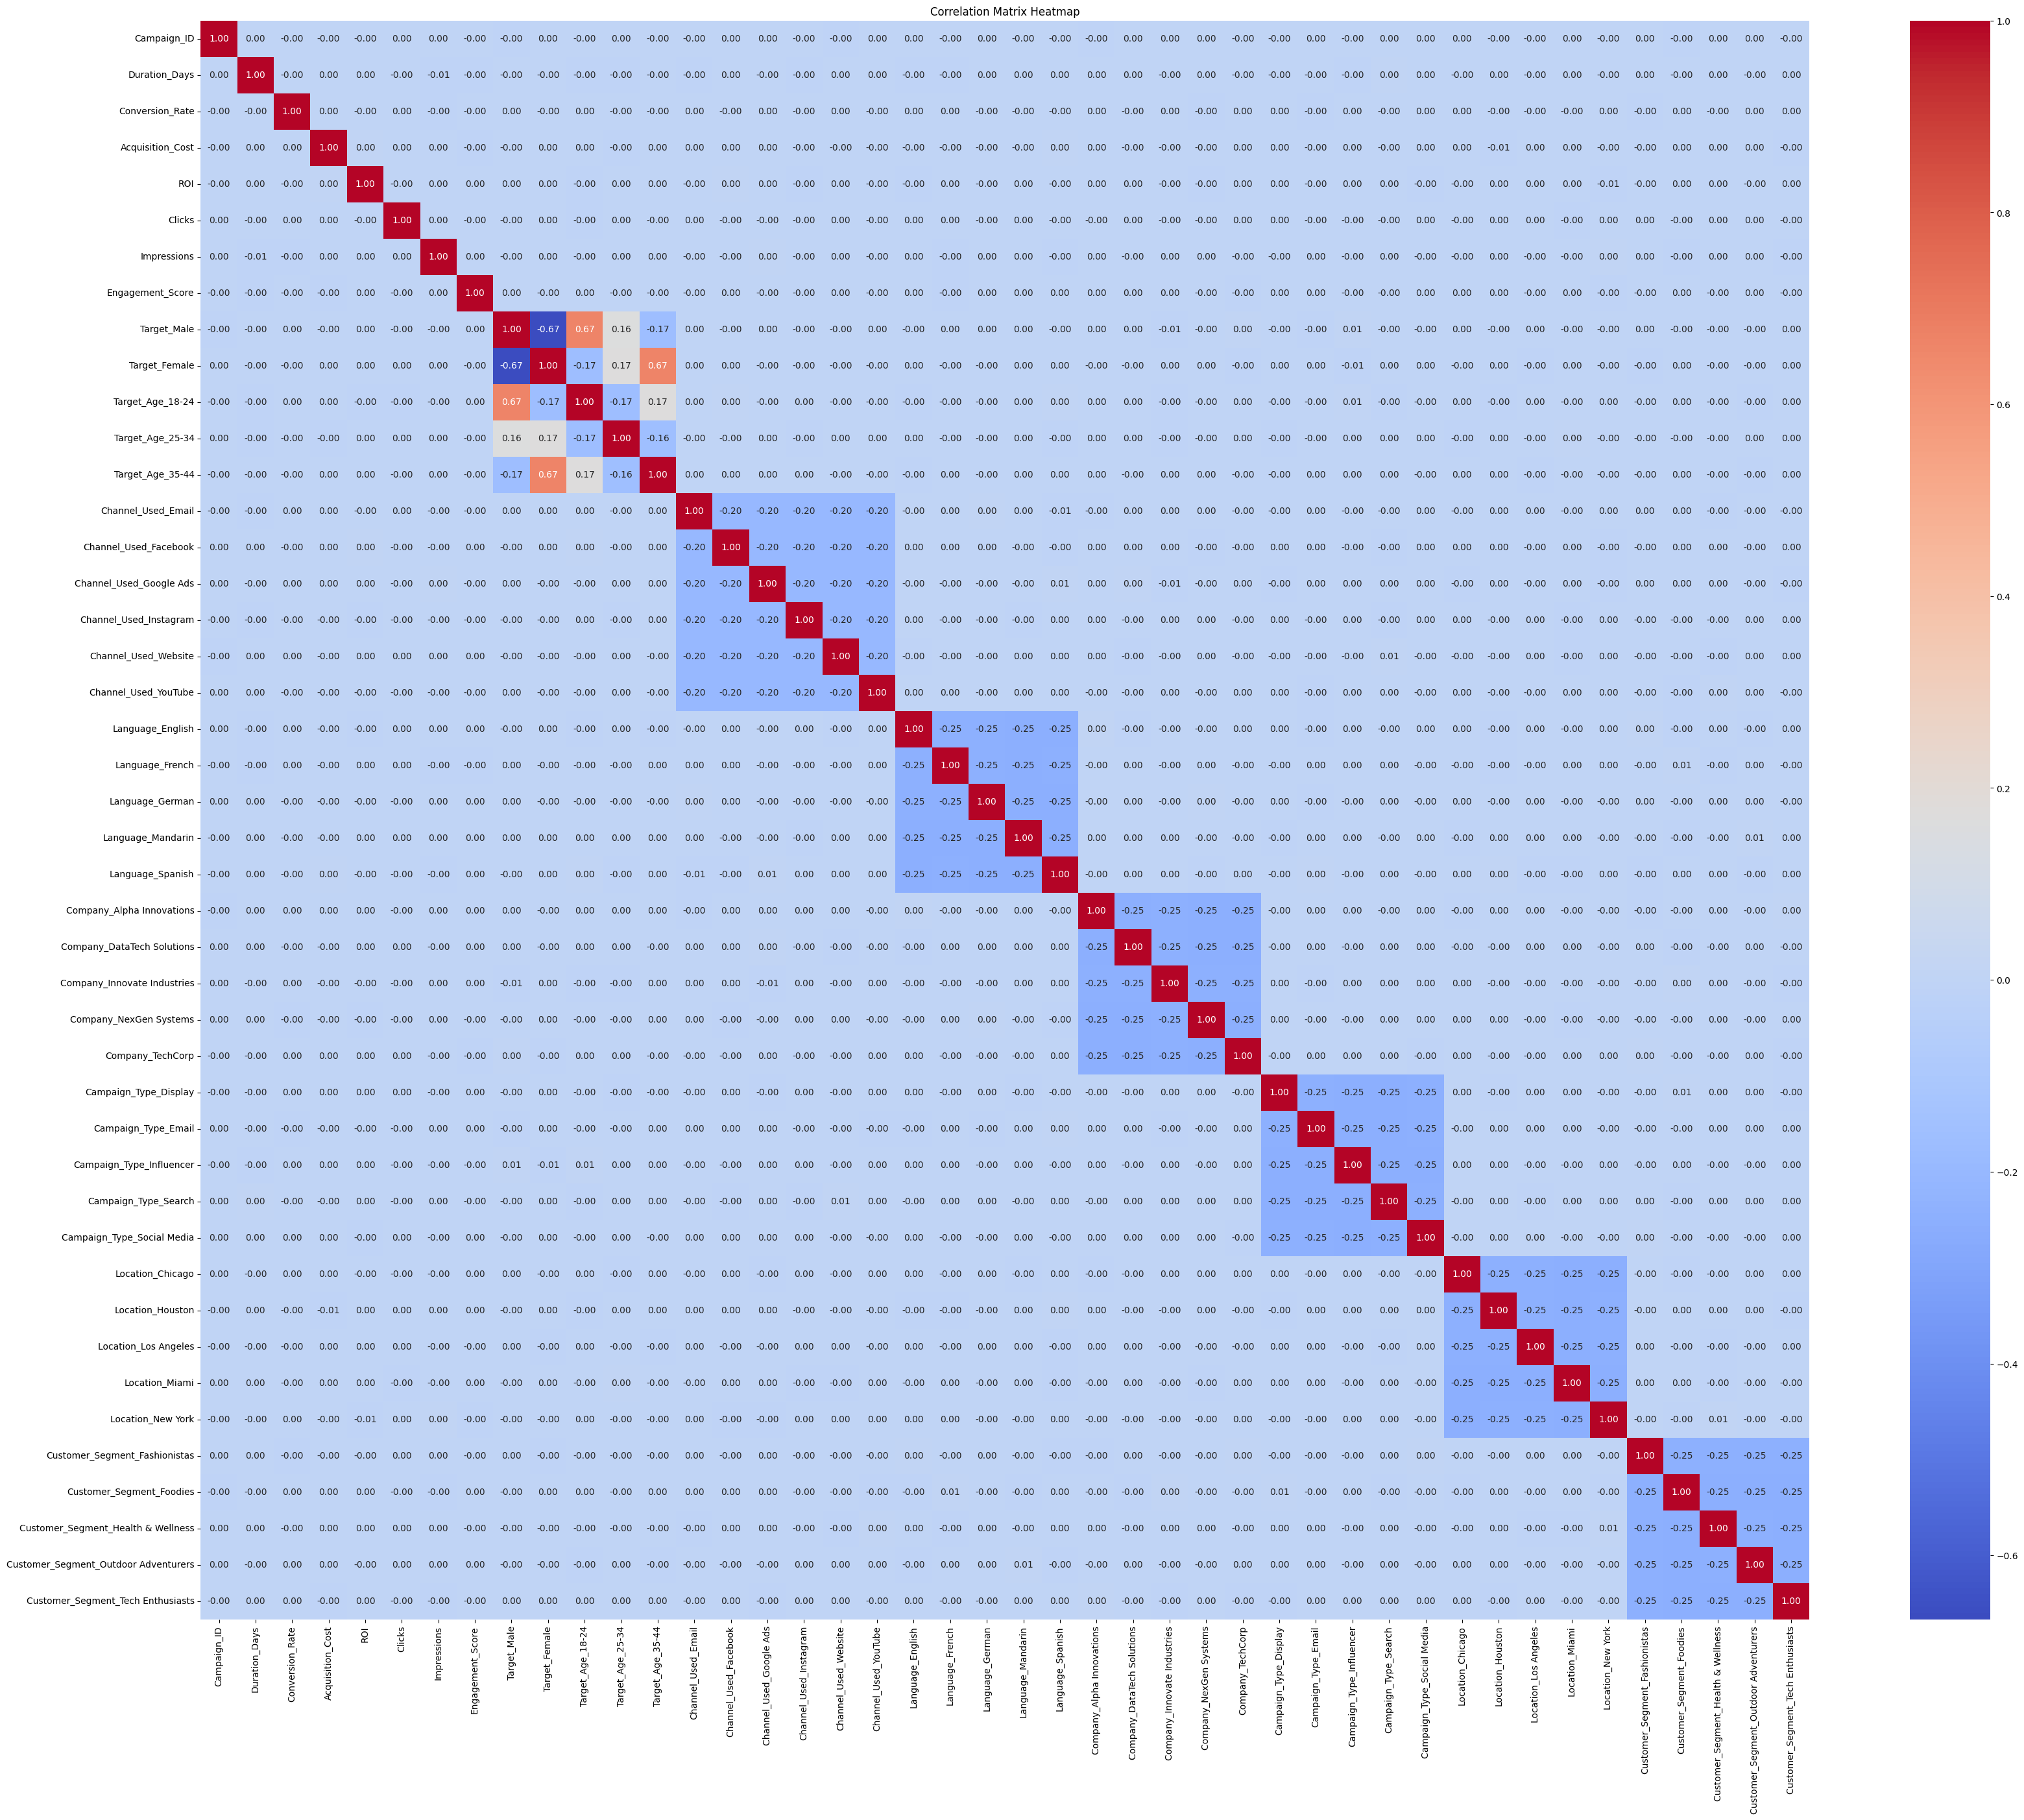

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = db.select_dtypes(include=['number', 'bool']).corr()
plt.figure(figsize=(40, 32))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# This is very clearly an artificial dataset, as the correlation between the variables is null

In [11]:
# Select a few random rows
random_rows = db.sample(5, random_state=1)
random_rows

,Campaign_ID,Duration_Days,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,Date,Target_Male,Target_Female,Target_Age_18-24,Target_Age_25-34,Target_Age_35-44,Channel_Used_Email,Channel_Used_Facebook,Channel_Used_Google Ads,Channel_Used_Instagram,Channel_Used_Website,Channel_Used_YouTube,Language_English,Language_French,Language_German,Language_Mandarin,Language_Spanish,Company_Alpha Innovations,Company_DataTech Solutions,Company_Innovate Industries,Company_NexGen Systems,Company_TechCorp,Campaign_Type_Display,Campaign_Type_Email,Campaign_Type_Influencer,Campaign_Type_Search,Campaign_Type_Social Media,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Customer_Segment_Fashionistas,Customer_Segment_Foodies,Customer_Segment_Health & Wellness,Customer_Segment_Outdoor Adventurers,Customer_Segment_Tech Enthusiasts
49673,49674,15,0.05,8869.0,7.05,495,4343,10,2021-02-03,0,1,0,0,1,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False
171551,171552,60,0.14,12836.0,3.27,516,6322,1,2021-01-02,1,0,1,0,0,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False
5506,5507,30,0.02,12614.0,5.08,874,5126,9,2021-02-01,1,1,1,1,1,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True
38370,38371,30,0.09,8501.0,7.25,372,8947,4,2021-02-15,1,0,0,1,0,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False
36930,36931,45,0.03,18988.0,3.76,366,5180,4,2021-03-07,1,0,1,0,0,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False


In [ ]:
# Esto no sirve para nada